<img src="https://i.imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px;"/>


# DSI-SG-42

## Project Two - Regression Challenge (HDB Price)

---


# 3. Model Building 

#### with Linear, Ridge, Lasso Regression

In [10]:
# import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings

# handle warnings
warnings.filterwarnings("ignore", category=UserWarning)




# setting displays
%matplotlib inline
pd.set_option('display.width', 100000)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# import cleaned csv file from 2.Feature Engineering
hdb = pd.read_csv('../datasets/hdb_cleaned2.csv', index_col=0, low_memory=False)


# inspect dataframe
print(hdb.head()) 

       id  floor_area_sqm  resale_price  tranc_year  tranc_month  hdb_age  max_floor_lvl  multistorey_carpark planning_area  mall_within_2km  hawker_within_2km  mrt_nearest_distance     mrt_name  bus_interchange                           pri_sch_name  nearby_top_sch  prop_one_room  prop_two_room  prop_three_room  prop_four_room  prop_five_room  prop_exec  prop_multigen  prop_studio_apt  North South Line  North East line  East West Line  Circle Line  Down Town Line  Thomson East Coast Line  floor_density  floor_category  flat_type_2 ROOM  flat_type_3 ROOM  flat_type_4 ROOM  flat_type_5 ROOM  flat_type_EXECUTIVE  flat_type_MULTI-GENERATION  flat_model_Adjoined flat  flat_model_Apartment  flat_model_DBSS  flat_model_Improved  flat_model_Improved-Maisonette  flat_model_Maisonette  flat_model_Model A  flat_model_Model A-Maisonette  flat_model_Model A2  flat_model_Multi Generation  flat_model_New Generation  flat_model_Premium Apartment  flat_model_Premium Apartment Loft  flat_model_Premium 

---
The $R^2$ value will be calculated with the following formula.

$$
Adjusted\, {R^2} = 1 - \frac{(1 - {R^2}) \times (n -1)}{n-k-1}
$$

where:
- $R^2$ is the coefficient of determinant for the data
- n is the number of samples in the data
- k is the number of features in the data

---

First, we build a base model of the features that we have selected are most likely affecting the resale prices before the feature engineering. 

In [4]:
# Filter the dataframe that comprise of the features that were likely to affect the resale price without one-hot encoding.
hdb_base = hdb[['floor_area_sqm', 'tranc_year', 'resale_price', 'tranc_month', 'hdb_age', 'max_floor_lvl', 'multistorey_carpark',
             'mall_within_2km', 'hawker_within_2km', 'mrt_nearest_distance',  'bus_interchange']]

# split the data into features and target variables
y = hdb['resale_price']
X = hdb_base.drop(columns=['resale_price'])


Statistics for Train Data:
Mean Squared Error: 4931625665.835779
Root Mean Squared Error: 70225.53428658111
R2 value: 0.7592015954008049
Adj R2 value: 0.7591816114673466
Cross Validation: 0.7591238586559204

      

Statistics for Test Data:
Mean Squared Error: 5019741304.300989
Root Mean Squared Error: 70850.13270489329
R2 value: 0.7582356773986263
Adj R2: 0.7581553996982008
Cross Validation: 0.758037391800659
Intercept: 9650488.149711685
      
Coefficients:
floor_area_sqm: 4086.431020291869
tranc_year: -4784.27034598054
tranc_month: -729.5120590153791
hdb_age: -2559.0756062864734
max_floor_lvl: 6274.270522081462
multistorey_carpark: -51607.700002739846
mall_within_2km: -143.39647273567184
hawker_within_2km: 14480.24606688825
mrt_nearest_distance: -41.50991687399139
bus_interchange: 17225.044640035278


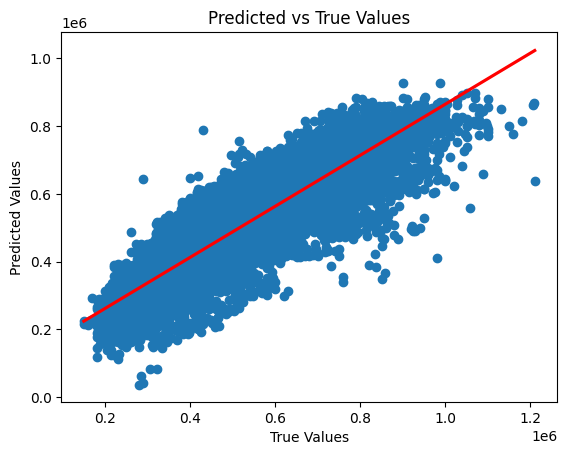

In [5]:
# Running a base Linear Regression model

# split the data into training and test set
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate linear regression model
lr = LinearRegression()

# fit the training data
lr.fit(X_train, y_train)

# obtain the predicted values
y_pred_base = lr.predict(X_test)
y_pred_train_base = lr.predict(X_train)

# Obtain key statistics for train data
mse_base_train = metrics.mean_squared_error(y_train, y_pred_train_base)
r2_value_train = metrics.r2_score(y_train, y_pred_train_base)
cv_score_train_base = cross_val_score(lr, X_train, y_train, cv =5)

#display adjusted R-squared
R2_adj_lr_train = 1 - (1-lr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)


print(f'''
Statistics for Train Data:
Mean Squared Error: {mse_base_train}
Root Mean Squared Error: {np.sqrt(mse_base_train)}
R2 value: {r2_value_train}
Adj R2 value: {R2_adj_lr_train}
Cross Validation: {cv_score_train_base.mean()}

      ''')


# Obtain key statistics for test data
mse_base = metrics.mean_squared_error(y_test, y_pred_base)
r2_value = metrics.r2_score(y_test, y_pred_base)
lr_coef = lr.coef_
lr_intercept = lr.intercept_
cv_score_base = cross_val_score(lr, X_test, y_test, cv =5)

#display adjusted R-squared
R2_adj_lr_test = 1 - (1-lr.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

# pair the coefficients with the column names
col_names = X.columns
names_coef = list(zip(col_names, lr_coef))


print(f'''
Statistics for Test Data:
Mean Squared Error: {mse_base}
Root Mean Squared Error: {np.sqrt(mse_base)}
R2 value: {r2_value}
Adj R2: {R2_adj_lr_test}
Cross Validation: {cv_score_base.mean()}
Intercept: {lr_intercept}
      ''')
print('Coefficients:')
for features, values in names_coef:
    print(f'{features}: {values}')


# plot the predicted vs true values
plt.scatter(y_test, y_pred_base)
sns.regplot(x = y_test, y = y_pred_base, scatter=False, color='red')
plt.title('Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.show()

The base model has an R2 value of 0.7582, in which, the predictor variables explain 76% of the variance of the resale price. However, we believe this value can increase further through the employment of feature engineering. This serves as a base model and we seek to optimize the model. 

---

### Model Building with Engineered Features

In [6]:
# set target and features

y = hdb['resale_price']
X = hdb.drop(columns=['resale_price',  'pri_sch_name', 'mrt_name', 'id', 'planning_area'])

# visual inspection of columns
print(X.shape) # check number of entries and columns
print(X.head()) # visual inspect features 

(150634, 56)
   floor_area_sqm  tranc_year  tranc_month  hdb_age  max_floor_lvl  multistorey_carpark  mall_within_2km  hawker_within_2km  mrt_nearest_distance  bus_interchange  nearby_top_sch  prop_one_room  prop_two_room  prop_three_room  prop_four_room  prop_five_room  prop_exec  prop_multigen  prop_studio_apt  North South Line  North East line  East West Line  Circle Line  Down Town Line  Thomson East Coast Line  floor_density  floor_category  flat_type_2 ROOM  flat_type_3 ROOM  flat_type_4 ROOM  flat_type_5 ROOM  flat_type_EXECUTIVE  flat_type_MULTI-GENERATION  flat_model_Adjoined flat  flat_model_Apartment  flat_model_DBSS  flat_model_Improved  flat_model_Improved-Maisonette  flat_model_Maisonette  flat_model_Model A  flat_model_Model A-Maisonette  flat_model_Model A2  flat_model_Multi Generation  flat_model_New Generation  flat_model_Premium Apartment  flat_model_Premium Apartment Loft  flat_model_Premium Maisonette  flat_model_Simplified  flat_model_Standard  flat_model_Terrace 


Statistics for Train Data:
Mean Squared Error: 3110467769.567924
Root Mean Squared Error: 55771.567752466166
R2 value: 0.8481239803625205
Adj R2 value: 0.8480533696767613
Cross Validation: 0.8478625728729071

      

Statistics for Test Data:
Mean Squared Error: 3123467746.220109
Root Mean Squared Error: 55887.99286269018
R2 value: 0.8495653425037808
Adj R2: 0.8492851848443266
Cross Validation: 0.849243982552534
Intercept: 11541523.193350917
      
Coefficients:
floor_area_sqm: 3576.0088784011987
tranc_year: -5633.221031218218
tranc_month: -753.9977091549177
hdb_age: -2983.459993969774
max_floor_lvl: 5826.169200091479
multistorey_carpark: -51735.74507973648
mall_within_2km: -492.57535938863384
hawker_within_2km: 6181.102925617746
mrt_nearest_distance: -50.787245578932925
bus_interchange: 13590.172156093757
nearby_top_sch: 57380.86797005782
prop_one_room: -117231.94948973472
prop_two_room: -72811.35738839599
prop_three_room: -41279.76118541621
prop_four_room: -52721.376220988735
prop_f

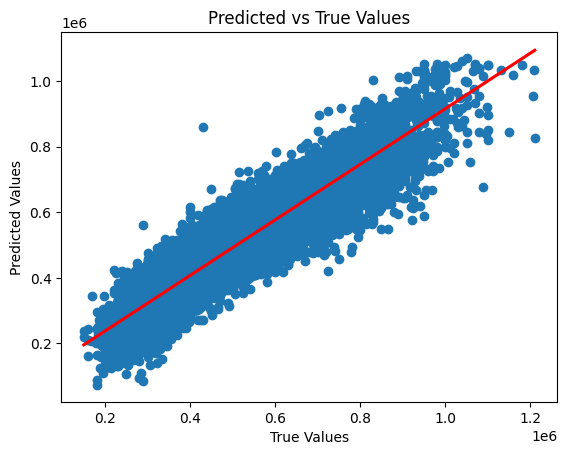

In [7]:
# Running a base Linear Regression model with engineered features

# split the data into training and test set
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate linear regression model
lr = LinearRegression()

# fit the training data
lr.fit(X_train, y_train)

# obtain the predicted values
y_pred_base = lr.predict(X_test)
y_pred_train_base = lr.predict(X_train)

# Obtain key statistics for train data
mse_base_train = metrics.mean_squared_error(y_train, y_pred_train_base)
r2_value_train = metrics.r2_score(y_train, y_pred_train_base)
cv_score_train_base = cross_val_score(lr, X_train, y_train, cv =5)

#display adjusted R-squared
R2_adj_lr_train = 1 - (1-lr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)


print(f'''
Statistics for Train Data:
Mean Squared Error: {mse_base_train}
Root Mean Squared Error: {np.sqrt(mse_base_train)}
R2 value: {r2_value_train}
Adj R2 value: {R2_adj_lr_train}
Cross Validation: {cv_score_train_base.mean()}

      ''')


# Obtain key statistics for test data
mse_base = metrics.mean_squared_error(y_test, y_pred_base)
r2_value = metrics.r2_score(y_test, y_pred_base)
lr_coef = lr.coef_
lr_intercept = lr.intercept_
cv_score_base = cross_val_score(lr, X_test, y_test, cv =5)

#display adjusted R-squared
R2_adj_lr_test = 1 - (1-lr.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

# pair the coefficients with the column names
col_names = X.columns
names_coef = list(zip(col_names, lr_coef))


print(f'''
Statistics for Test Data:
Mean Squared Error: {mse_base}
Root Mean Squared Error: {np.sqrt(mse_base)}
R2 value: {r2_value}
Adj R2: {R2_adj_lr_test}
Cross Validation: {cv_score_base.mean()}
Intercept: {lr_intercept}
      ''')
print('Coefficients:')
for features, values in names_coef:
    print(f'{features}: {values}')


# plot the predicted vs true values
plt.scatter(y_test, y_pred_base)
sns.regplot(x = y_test, y = y_pred_base, scatter=False, color='red')
plt.title('Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.show()

Based on the results of the base model, our R2 values for training data (0.8479) vs test data (0.8492) were marginally different and could indicate that our model might be slightly overfitted. The comparisons of cross validation score within training and testing R2 values were adequately close. 

In comparing with the base model (without feature engineering), the R2 value increased from 0.7582 to 0.8492. This strongly indicates that adding additional features that were engineered were beneficial to the model. The adjusted R2 had a difference of 0.00025 between its R2 value of the test data, indicating that the variation explained by the indpendent variables after adjustment were very similar without the adjustment. 

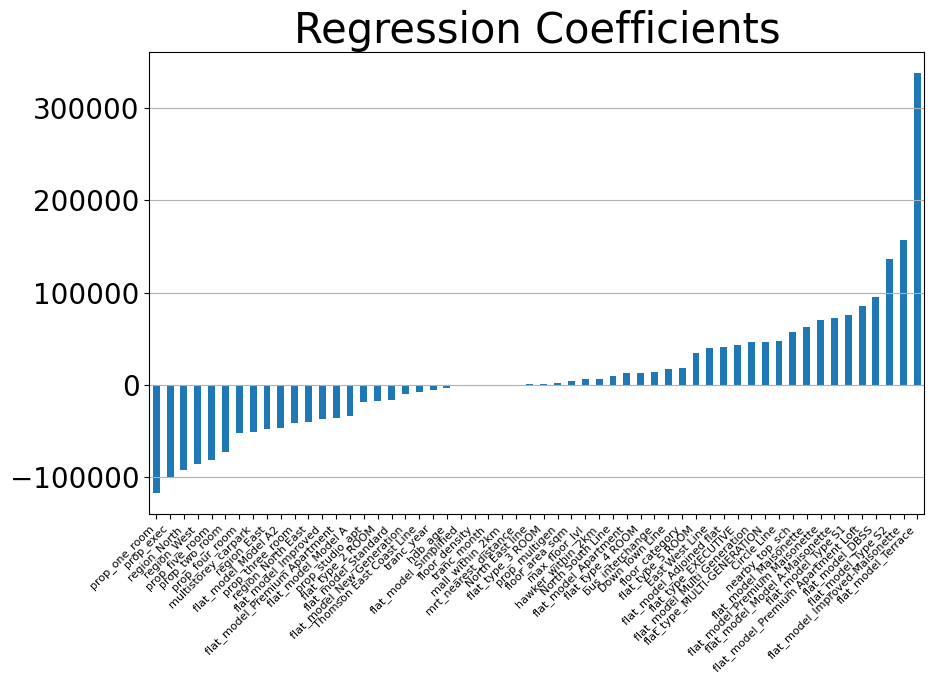

In [8]:
## Visualising the Regression Coefficients

# Calculating the regression coefficients
predictors = X.columns
coef = pd.Series(lr.coef_, predictors).sort_values()

# Plotting the Coefficients
plt.figure(figsize=(10,6))
coef.plot(kind = 'bar', fontsize=20)
plt.title('Regression Coefficients', fontsize= 30)
plt.xticks(rotation =45, fontsize = 8, ha= 'right')
plt.grid(axis='y')
plt.show()

## Ridge (L2) regression


Statistics for Ridge Regression Train Data:
Mean Squared Error: 3110563295.3445945
Root Mean Squared Error: 55772.42414800162
R2 value: 0.8481193160882671
Adj R2: 0.8480487032339785
Cross Validation: 0.8478670787114648    
      

Statistics for Ridge Regression Test Data:
MSE: 3123697306.6547346
RMSE: 55890.04657946471
R2 value: 0.8495542862521517
Adj R2: 0.8492741080024051
Cross Validation: 0.8492151270390893
Intercept: 11580536.124213688
      
      
floor_area_sqm: 3582.1248651168057
tranc_year: -5633.642293284248
tranc_month: -753.7138609167134
hdb_age: -2983.758780578571
max_floor_lvl: 5827.491651402891
multistorey_carpark: -50110.35625267347
mall_within_2km: -492.08250216865923
hawker_within_2km: 6186.64332803588
mrt_nearest_distance: -50.79156569436252
bus_interchange: 13598.047588889887
nearby_top_sch: 57324.78816019251
prop_one_room: -109688.09890137258
prop_two_room: -70205.33844762901
prop_three_room: -38838.89879192401
prop_four_room: -50220.70776466688
prop_five_room: -

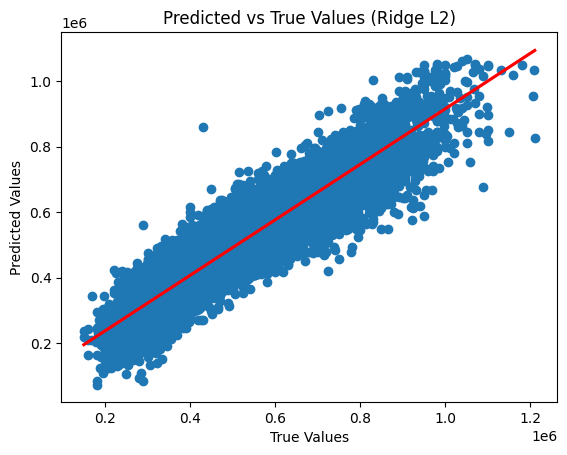

In [7]:
# Plotting Ridge (L2) regression

# instantiate ridge regression model with 1000 iterations
ridge = Ridge(max_iter=1000)

# fit the training data
ridge.fit(X_train, y_train)

# obtain the predicted ridge values
y_pred_ridge_train = ridge.predict(X_train)
y_pred_ridge = ridge.predict(X_test)



# Obtain key statistics on train data
mse_ridge_train = metrics.mean_squared_error(y_train, y_pred_ridge_train)
r2_value_ridge_train = metrics.r2_score(y_train, y_pred_ridge_train)
cv_score_ridge_train = cross_val_score(ridge, X_train, y_train, cv = 5)

#display adjusted R-squared
R2_adjusted_ridge_train = 1 - (1-ridge.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)


print(f'''
Statistics for Ridge Regression Train Data:
Mean Squared Error: {mse_ridge_train}
Root Mean Squared Error: {np.sqrt(mse_ridge_train)}
R2 value: {r2_value_ridge_train}
Adj R2: {R2_adjusted_ridge_train}
Cross Validation: {cv_score_ridge_train.mean()}    
      ''')


# Obtain key statistics on test data
mse_ridge_test = metrics.mean_squared_error(y_test, y_pred_ridge)
r2_value_ridge = metrics.r2_score(y_test, y_pred_ridge)
cv_score_ridge_test = cross_val_score(ridge, X_test, y_test, cv = 5)
ridge_coef_test = ridge.coef_
ridge_intercept_test = ridge.intercept_

#display adjusted R-squared
R2_adjusted_ridge_test = 1 - (1-ridge.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

col_names = X_test.columns

names_coef_ridge = list(zip(col_names, ridge_coef_test))

print(f'''
Statistics for Ridge Regression Test Data:
MSE: {mse_ridge_test}
RMSE: {np.sqrt(mse_ridge_test)}
R2 value: {r2_value_ridge}
Adj R2: {R2_adjusted_ridge_test}
Cross Validation: {cv_score_ridge_test.mean()}
Intercept: {ridge_intercept_test}
      
      ''')

for features, values in names_coef_ridge:
    print(f'{features}: {values}')


plt.scatter(y_test, y_pred_ridge)
sns.regplot(x = y_test, y = y_pred_ridge, scatter=False, color='red')
plt.title('Predicted vs True Values (Ridge L2)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')


plt.show()

# Lasso (L1) Regression

/opt/anaconda3/envs/GA-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.492e+11, tolerance: 1.977e+11
  model = cd_fast.enet_coordinate_descent(



Statistics for Lasso Regression Train Data:
Mean Squared Error: 3110592104.953107
Root Mean Squared Error: 55772.68242565626
R2 value: 0.8481179093903064
Adj R2: 0.8480472958820113
Cross Validation: 0.8478647286794869    
      


/opt/anaconda3/envs/GA-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.553e+12, tolerance: 5.022e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/GA-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.568e+12, tolerance: 5.021e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/GA-env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis


Statistics for Lasso Regression Test Data:
MSE: 3123757279.086841
R2 value: 0.8495513978175603
Adj R2: 0.8492712141886206
Cross Validation: 0.8492365467937539
Intercept: 11591534.41907803
      
      
floor_area_sqm: 3588.1091189772783
tranc_year: -5633.7865549052
tranc_month: -753.6243905053076
hdb_age: -2985.1004493133596
max_floor_lvl: 5831.75119625378
multistorey_carpark: -47765.63225914235
mall_within_2km: -491.498505820045
hawker_within_2km: 6186.813696206153
mrt_nearest_distance: -50.79850020631619
bus_interchange: 13592.293278736472
nearby_top_sch: 57309.19636763325
prop_one_room: -123977.28124852365
prop_two_room: -68588.26760892718
prop_three_room: -37150.702928310464
prop_four_room: -48417.303696236544
prop_five_room: -76999.61131232005
prop_exec: -96066.2907395737
prop_multigen: 3187.813321472018
prop_studio_apt: -13275.414819643833
North South Line: 9181.474758033095
North East line: 486.5004050191528
East West Line: 40051.79665891229
Circle Line: 47689.32415665655
Down 

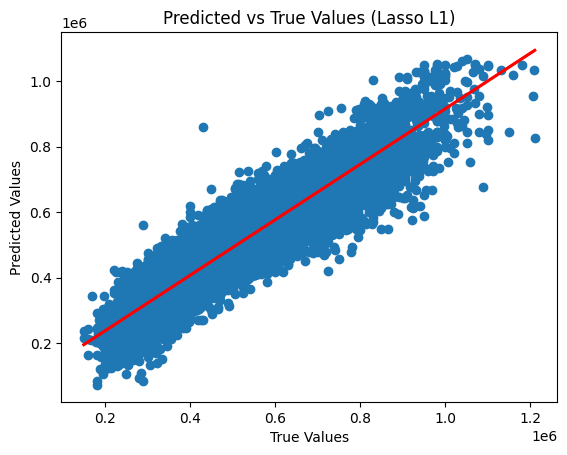

In [8]:
# Plotting lasso (L2) regression

# instantiate lasso regression model with 1000 iterations
lasso = Lasso(max_iter=10000)

# fit the training data
lasso.fit(X_train, y_train)

# obtain the predicted lasso values
y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso = lasso.predict(X_test)



# Obtain key statistics on train data
mse_lasso_train = metrics.mean_squared_error(y_train, y_pred_lasso_train)
r2_value_lasso_train = metrics.r2_score(y_train, y_pred_lasso_train)
cv_score_lasso_train = cross_val_score(lasso, X_train, y_train, cv = 5)

#display adjusted R-squared
R2_adjusted_lasso_train = 1 - (1-lasso.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)


print(f'''
Statistics for Lasso Regression Train Data:
Mean Squared Error: {mse_lasso_train}
Root Mean Squared Error: {np.sqrt(mse_lasso_train)}
R2 value: {r2_value_lasso_train}
Adj R2: {R2_adjusted_lasso_train}
Cross Validation: {cv_score_lasso_train.mean()}    
      ''')


# Obtain key statistics on test data
mse_lasso_test = metrics.mean_squared_error(y_test, y_pred_lasso)
r2_value_lasso = metrics.r2_score(y_test, y_pred_lasso)
cv_score_lasso_test = cross_val_score(lasso, X_test, y_test, cv = 5)
lasso_coef_test = lasso.coef_
lasso_intercept_test = lasso.intercept_

#display adjusted R-squared
R2_adjusted_lasso_test = 1 - (1-lasso.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

col_names = X_test.columns

names_coef_lasso = list(zip(col_names, lasso_coef_test))

print(f'''
Statistics for Lasso Regression Test Data:
MSE: {mse_lasso_test}
R2 value: {r2_value_lasso}
Adj R2: {R2_adjusted_lasso_test}
Cross Validation: {cv_score_lasso_test.mean()}
Intercept: {lasso_intercept_test}
      
      ''')

for features, values in names_coef_lasso:
    print(f'{features}: {values}')


plt.scatter(y_test, y_pred_lasso)
sns.regplot(x = y_test, y = y_pred_lasso, scatter=False, color='red')
plt.title('Predicted vs True Values (Lasso L1)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')


plt.show()

## Employing StandardScaler with LinearRegression


Statistics for Train Data:
Mean Squared Error: 3110491976.981949
Root Mean Squared Error: 55771.784774937485
R2 value: 1.0
Adj R2: 1.0
Cross Validation: 0.9999999999811615
Intercept: 449015.83859911887
      
Coefficients:
floor_area_sqm: 86944.26852778878
tranc_year: -15490.478815161394
tranc_month: -2528.3714779151087
hdb_age: -36195.05232784597
max_floor_lvl: 36182.93201401601
multistorey_carpark: -810.0427371001829
mall_within_2km: -1727.4170404983506
hawker_within_2km: 24769.607979310113
mrt_nearest_distance: -21816.448017504197
bus_interchange: 6758.573150519094
nearby_top_sch: 10949.457286215127
prop_one_room: -581335490861954.1
prop_two_room: -5124.4495000571715
prop_three_room: -14894.152962037188
prop_four_room: -17443.057270182093
prop_five_room: -24820.19520615314
prop_exec: -25522.304398918524
prop_multigen: 34.74738236567782
prop_studio_apt: -609.8022751507087
North South Line: 4363.453193158546
North East line: 235.4440140757033
East West Line: 17985.415446454088
Circle

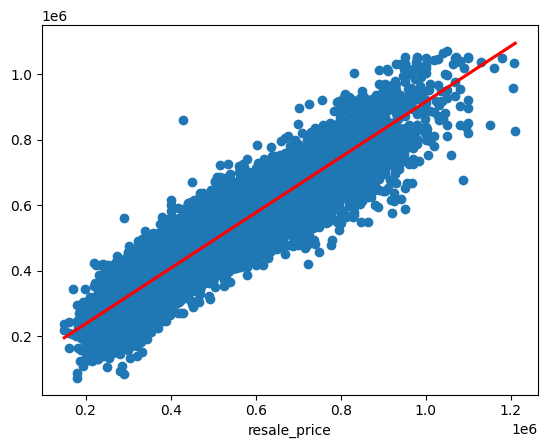

In [11]:
# Scaling variables with StandardScaler

# split to training and test data
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate StandardScaler
ss = StandardScaler()

# Transform X_train and X_test
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X.columns)

# Instantiate LinearRegression
lr_scaled = LinearRegression()

# Fit the model with training data
lr_scaled.fit(X_train_scaled_df, y_train)

# obtain predicted values
y_pred_scaled = lr_scaled.predict(X_test_scaled_df)
y_pred_train_scaled = lr_scaled.predict(X_train_scaled)


# Obtain key statistics of the train model
mse_train_scaled = metrics.mean_squared_error(y_train, y_pred_train_scaled)
r2_value_lr_train_scaled = lr_scaled.score(X_train_scaled_df, y_pred_train_scaled)
lr_coef = lr_scaled.coef_
lr_intercept_train = lr_scaled.intercept_
cv_score_scaled_train = cross_val_score(lr_scaled, X_train_scaled_df, y_pred_train_scaled, cv = 5)

#display adjusted R-squared
R2_adj_lr_scaled_train= 1 - (1-lr_scaled.score(X_train_scaled_df, y_pred_train_scaled))*(len(y_pred_train_scaled)-1)/(len(y_pred_train_scaled)-X_train_scaled_df.shape[1]-1)

col_names = X.columns

names_coef = list(zip(col_names, lr_coef))


print(f'''
Statistics for Train Data:
Mean Squared Error: {mse_train_scaled}
Root Mean Squared Error: {np.sqrt(mse_train_scaled)}
R2 value: {r2_value_lr_train_scaled}
Adj R2: {R2_adj_lr_scaled_train}
Cross Validation: {cv_score_scaled_train.mean()}
Intercept: {lr_intercept_train}
      ''')
print('Coefficients:')
for features, values in names_coef:
    print(f'{features}: {values}')



# Obtain key statistics of the test model
mse = metrics.mean_squared_error(y_test, y_pred_scaled)
r2_value_lr_scaled = lr_scaled.score(X_test_scaled_df, y_test)
lr_coef = lr_scaled.coef_
lr_intercept = lr_scaled.intercept_
cv_score_scaled = cross_val_score(lr_scaled, X_test_scaled_df, y_test, cv = 5)

#display adjusted R-squared
R2_adj_lr_scaled = 1 - (1-lr_scaled.score(X_test_scaled_df, y_test))*(len(y_test)-1)/(len(y_test)-X_test_scaled_df.shape[1]-1)

col_names = X.columns

names_coef = list(zip(col_names, lr_coef))


print(f'''
Statistics for Test Data:
Mean Squared Error: {mse}
Root Mean Squared Error: {np.sqrt(mse)}
R2 value: {r2_value_lr_scaled}
Adj R2: {R2_adj_lr_scaled}
Cross Validation: {cv_score_scaled.mean()}
Intercept: {lr_intercept}
      ''')
print('Coefficients:')
for features, values in names_coef:
    print(f'{features}: {values}')


plt.scatter(y_test, y_pred_scaled)
sns.regplot(x = y_test, y = y_pred_scaled, scatter=False, color='red')


plt.show()

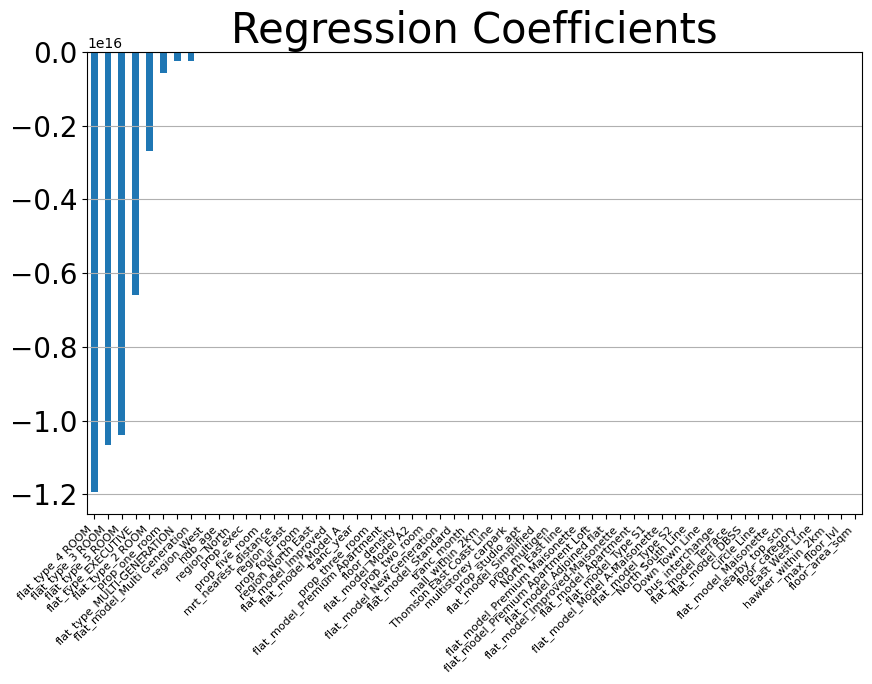

In [10]:
## Visualising the Regression Coefficients

# Calculating the regression coefficients
predictors = X.columns
coef = pd.Series(lr_scaled.coef_, predictors).sort_values()

# Plotting the Coefficients
plt.figure(figsize=(10,6))
coef.plot(kind = 'bar', fontsize=20)
plt.title('Regression Coefficients', fontsize= 30)
plt.xticks(rotation =45, fontsize = 8, ha= 'right')
plt.grid(axis='y')
plt.show()

### Table Summary

| Baseline           | Baseline	    | Baseline	     | Base (LinearReg)      | Base (LinearReg)      | Ridge (L2)    | Ridge (L2)     | Lasso (L1)     | Lasso (L1)      | LinReg (SS)	|LinReg (SS)	|
|--------------------|-------------|-------------|--------------|-------------|--------------|-------------|--------------|-------------|--------------|-------------|
|                    |             |             |              |             |              |             |              |             |              |             |
| Parameters         | Train       | Test        | Train        | Test        | Train        | Test        | Train        | Test        | Train        | Test        |
| MSE                | 4931625665.83578 | 5019741304.30099 | 3120455883.87812 | 3131016127.04941 | 3120567243.97344 | 3131239005.84914 | 3114806570.06442 | 3130445674.84443 | 4931625665.83576 | 3131016127.04941 |
| RMSE               | 70225.534286581 | 70850.132704893 | 55861.040841342 | 55955.483440405 | 55862.037592389 | 55957.474977425 | 55810.452157857 | 55950.385832847 | 70225.534286581 | 55955.483440405 |
| R2                 | 0.759201595 | 0.758235677 | 0.847636287 | 0.849201792 | 0.847630849 | 0.849191058 | 0.847912128 | 0.849229267 | 1.0 | 0.849201792 |
| Adj R2             | 0.759181611 | 0.758155400 | 0.847573042 | 0.848951097 | 0.847567603 | 0.848940345 | 0.847840156 | 0.848943460 | 1.0 | 0.848951097 |
| CV score           | 0.759123859 | 0.758037392 | 0.847373907 | 0.848892172 | 0.847377330 | 0.848871297 | 0.847654178 | 0.848921731 | 1.0 | 0.848892658 |
| Intercept          | None |9650488.14971169 | None | 11544983.7985385 | None | 11594311.3395181 | None | 11593134.17892 | None  |449015.838599118 |


The table above shows the results from the various models and the R2 values between train and test data do not differ mucch, indicating that the model are not overfitted or underfitted between the models. Hence, we will disregard the results from the train data and compare the results from the test data. 

Additionally, the table shows the adjusted R2 were similar to R2 values, and is used to determine the goodness-of-fit for the model. Since the differences are minor, our predictor variables do explain about 85% of the variance of the model. In determining the optimal model to use, we consider that overfitting was not an issue with our model and scaling the variables was not beneficial to this analysis. Thus, the linear regression trained wtih engineered features was the most optimal model used to predict the resale value of unknown data. 


The table above shows the results from the various models and the R2 values between train and test data do not differ mucch, indicating that the model are not overfitted or underfitted between the models. Hence, we will disregard the results from the train data and compare the results from the test data. 

Additionally, the table shows the adjusted R2 were similar to R2 values, and is used to determine the goodness-of-fit for the model. Since the differences are minor, our predictor variables do explain about 85% of the variance of the model. In determining the optimal model to use, we consider that overfitting was not an issue with our model and scaling the variables was not beneficial to this analysis. Thus, the linear regression trained wtih engineered features was the most optimal model used to predict the resale value of unknown data. 

## Conclusion

We have found that the model has increased in accuracy after it has used engineered features had a 10% increased in its adjusted R2 score rendering it a much better model. The predictors is able to explain 85% of the resale price variability of new data. Even though, Ridge and Lasso's adjusted R2 value were similar to the Linear Regression model, our model was not overfitted and thus, were not selected to be used in the final model. 

